### Importação dos dados



Conclusões

In [200]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [201]:
# Explorando a estrutura dos DataFrames
print('LINHAS:')
print(f'  loja1: {loja.shape[0]} \n  loja2: {loja2.shape[0]} \n  loja3: {loja3.shape[0]} \n  loja4: {loja4.shape[0]}\n')

print('COLUNAS:')
for coluna in loja.columns:
    print('  ', coluna)

LINHAS:
  loja1: 2359 
  loja2: 2359 
  loja3: 2359 
  loja4: 2358

COLUNAS:
   Produto
   Categoria do Produto
   Preço
   Frete
   Data da Compra
   Vendedor
   Local da compra
   Avaliação da compra
   Tipo de pagamento
   Quantidade de parcelas
   lat
   lon


In [202]:
# Adicionando o nome da loja em cada DataFrame
loja['loja'] = 1
loja2['loja'] = 2
loja3['loja'] = 3
loja4['loja'] = 4

# Concatenando os DataFrames em um único DataFrame
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,1


In [203]:
# identificando os tipos de dados e dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  loja                    9435 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 958.4+ KB


In [204]:
# Estatísticas descritivas dos dados
df.describe(include='all')

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
count,9435,9435,9435.000000,9435.000000,9435,9435,9435,9435.000000,9435,9435.000000,9435.000000,9435.000000,9435.000000
unique,51,8,NaN,NaN,1185,14,27,NaN,4,NaN,NaN,NaN,NaN
top,Cômoda,moveis,NaN,NaN,06/02/2020,Thiago Silva,SP,NaN,cartao_credito,NaN,NaN,NaN,NaN
freq,210,1886,NaN,NaN,18,744,3943,NaN,6898,NaN,NaN,NaN,NaN
mean,NaN,NaN,622.309570,33.167002,NaN,NaN,NaN,4.014520,NaN,2.927398,-20.534059,-47.171176,2.499841
std,NaN,NaN,787.094508,41.973711,NaN,NaN,NaN,1.390518,NaN,2.802776,5.399153,4.177887,1.118046
min,NaN,NaN,10.070000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,-30.170000,-70.550000,1.000000
25%,NaN,NaN,73.610000,4.009423,NaN,NaN,NaN,3.000000,NaN,1.000000,-22.250000,-48.790000,1.500000
50%,NaN,NaN,295.350000,15.648481,NaN,NaN,NaN,5.000000,NaN,1.000000,-22.190000,-48.790000,2.000000
75%,NaN,NaN,884.405000,46.591030,NaN,NaN,NaN,5.000000,NaN,4.000000,-18.100000,-44.380000,3.000000


In [252]:
fontsize_titulo = 14
fontsize_eixos = 12

# Definindo a paleta de cores para as lojas
cores_paleta_lojas = ['#EED7D3', '#C89BA3', '#9E6B82', '#3B2A3E']

categorias_unicas = df['Categoria do Produto'].unique()

cores_paleta = plt.cm.Pastel1(np.linspace(0, 1, len(categorias_unicas)))
cor_categoria = {categoria: cores_paleta[idx] for idx, categoria in enumerate(categorias_unicas)}

num_lojas = len(df['loja'].unique())

# 1. Análise Faturamento

In [ ]:
df_aux = df.copy()
df_aux['Data da Compra'] = pd.to_datetime(df_aux['Data da Compra'], format='%d/%m/%Y')
df_aux['Mes_Ano'] = df_aux['Data da Compra'].dt.to_period('M') 
df_aux['Ano'] = df_aux['Data da Compra'].dt.to_period('Y') 

df_group_fat = df.groupby('loja').agg(sum_preco = ("Preço",'sum')).reset_index()
df_group_fat

,loja,sum_preco
0,1,1534509.12
1,2,1488459.06
2,3,1464025.03
3,4,1384497.58


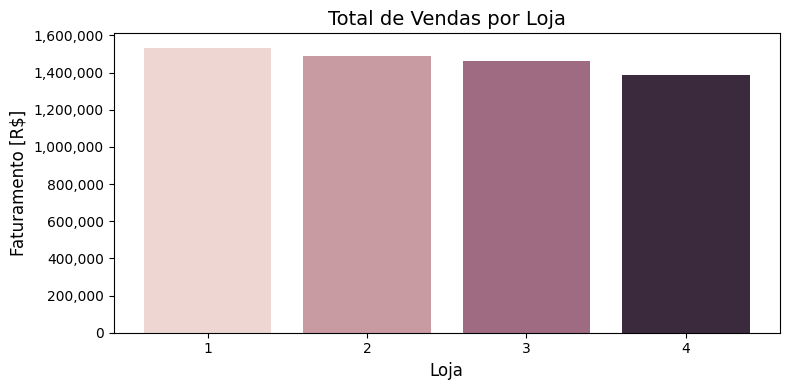

In [311]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.arange(len(df_group_fat))  
bars = ax.bar(x, df_group_fat['sum_preco'], color=cores_paleta_lojas)

ax.set_title('Total de Vendas por Loja', fontsize=fontsize_titulo)
ax.set_xlabel('Loja', fontsize=fontsize_eixos)
ax.set_ylabel('Faturamento [R$]', fontsize=fontsize_eixos)

ax.set_xticks(x) 
ax.set_xticklabels(df_group_fat['loja'], fontsize=10)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))  # Sem notação científica

plt.tight_layout()
plt.show()

Interpretações
- Loja 1 lidera o faturamento total, sendo a mais lucrativa entre as quatro lojas.
- Loja 2 tem um desempenho próximo da Loja 1, sugerindo que ambas podem estar operando em mercados similares ou com estratégias eficazes.
- Loja 3 possui um faturamento intermediário
- Loja 4 tem o menor faturamento, indicando menor volume de vendas ou preço médio dos produtos mais baixo.
- Diferença de estratégia de vendas – Lojas 1 e 2 podem ter melhor marketing, mix de produtos, ou preços competitivos.
- Produtos vendidos – Se a Loja 4 vende itens de menor valor unitário, pode ter menos impacto no faturamento total.

Análise 
- Existe correlação entre número de vendas e valor total faturado?

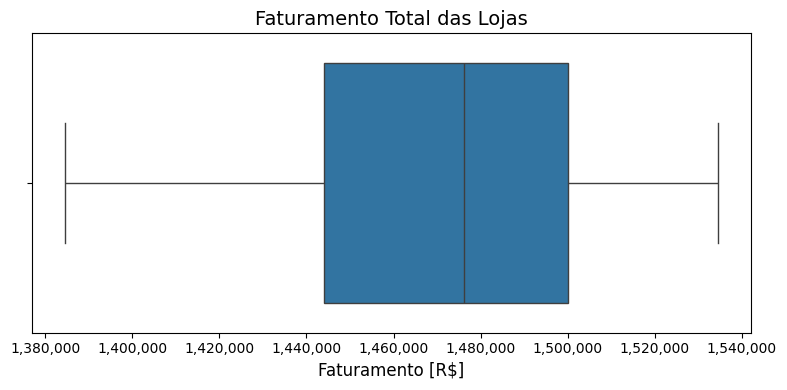

In [ ]:
plt.figure(figsize=(8, 4)) 
sns.boxplot(x=df_group_fat['sum_preco'], orient='h') 

# Ajustar formatação dos números no eixo X
plt.ticklabel_format(style='plain', axis='x')
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.title('Faturamento Total das Lojas', fontsize = fontsize_titulo)
plt.xlabel('Faturamento [R$]', fontsize = fontsize_eixos)
plt.ylabel('')  

plt.tight_layout()
plt.show()

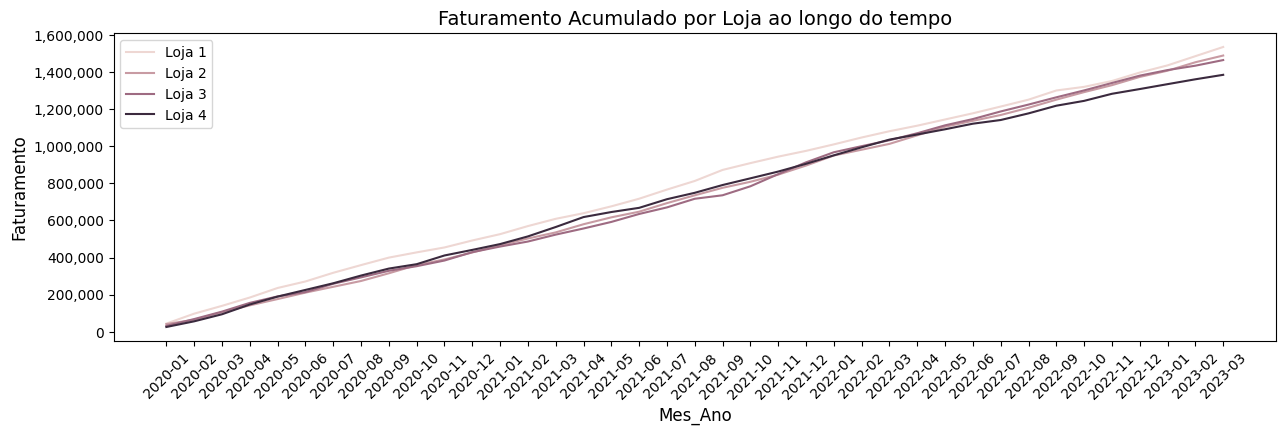

In [ ]:
df_group_fat_loja = df_aux.groupby(['loja','Mes_Ano']).agg(sum_preco = ('Preço','sum')).reset_index()

plt.figure(figsize=(15, 4))

for idx, i in enumerate(df_group_fat_loja['loja'].unique()):

    df_aux = df_group_fat_loja[df_group_fat_loja['loja'] == i].copy()
    df_aux = df_aux.sort_values('Mes_Ano')
    df_aux.set_index('Mes_Ano', inplace=True)
    df_aux['CUMSUM'] = df_aux['sum_preco'].cumsum()

    plt.plot(df_aux.index.astype(str), df_aux['CUMSUM'], label=f'Loja {i}', color = cores_paleta_lojas[idx]) 

plt.title('Faturamento Acumulado por Loja ao longo do tempo', size = fontsize_titulo)
plt.xlabel('Mes_Ano', size = fontsize_eixos)
plt.ylabel('Faturamento',size = fontsize_eixos)
plt.legend()

plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.show()

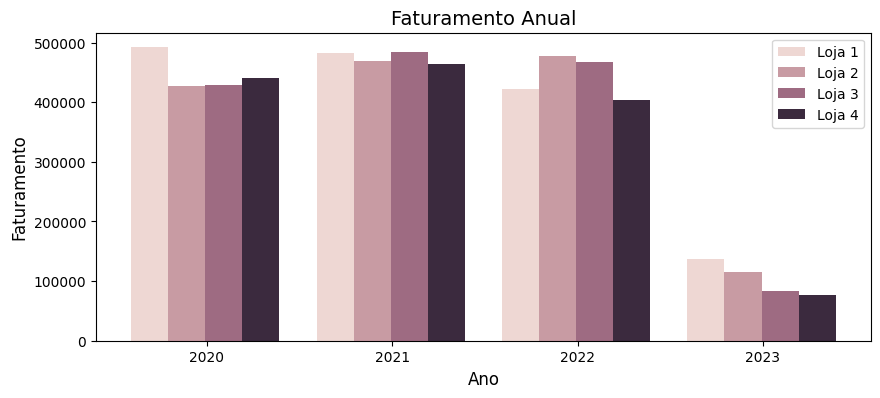

In [320]:
df_group_fat_loja = df_aux.groupby(['loja','Ano']).agg(sum_preco_ano = ('Preço', 'sum')).reset_index()
df_pivot = df_group_fat_loja.pivot(index='Ano', columns='loja', values='sum_preco_ano')

plt.figure(figsize=(10, 4))

anos = df_pivot.index.astype(str)
x = np.arange(len(anos))  # Posições no eixo x

bar_width = 0.2
for idx, loja in enumerate(df_pivot.columns):
    plt.bar(x + idx * bar_width, df_pivot[loja], width=bar_width, label=f'Loja {loja}', color=cores_paleta_lojas[idx])  # Aplicando cores personalizadas

# Ajustando a posição dos rótulos no eixo X para centralizar
plt.xticks(x + bar_width * (len(df_pivot.columns) / 2.6), anos)

plt.title('Faturamento Anual', size=fontsize_titulo)
plt.xlabel('Ano', size=fontsize_eixos)
plt.ylabel('Faturamento', size=fontsize_eixos)
plt.legend()

plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [323]:
df_group_fat_loja

,loja,Ano,sum_preco_ano
0,1,2020,491911.51
1,1,2021,482829.91
2,1,2022,422086.24
3,1,2023,137681.46
4,2,2020,427288.25
5,2,2021,468288.89
6,2,2022,477635.56
7,2,2023,115246.36
8,3,2020,428943.09
9,3,2021,483938.91


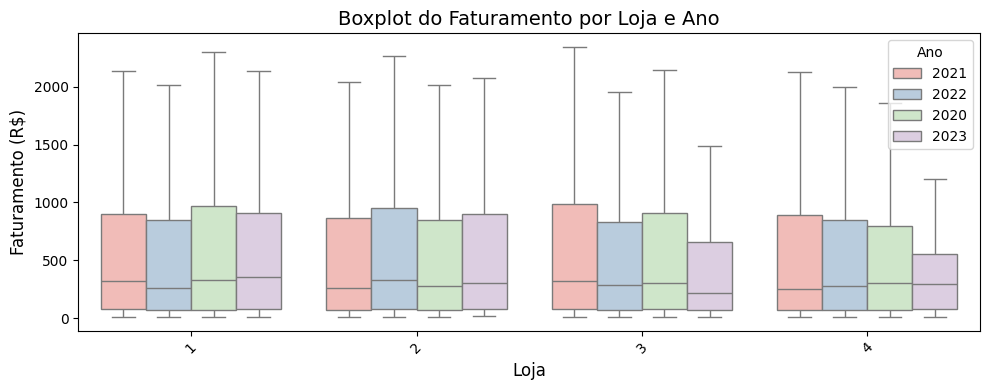

In [339]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='loja', y='Preço', hue='Ano', data=df_aux, palette='Pastel1',showfliers=False)

plt.title('Boxplot do Faturamento por Loja e Ano', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Ano')
plt.tight_layout()
plt.show()


In [ ]:
d = df_aux.groupby(['loja','Ano']).agg(sum_preco = ('Preço','sum'), qtd_itens=('Produto','count')).reset_index()

# Calcular a correlação entre faturamento e quantidade de itens vendidos
correlation = d[['sum_preco', 'qtd_itens']].corr()
print(correlation)


           sum_preco  qtd_itens
sum_preco   1.000000   0.988802
qtd_itens   0.988802   1.000000


In [347]:
print('MIN:', df_aux[df_aux['Ano']=='2023']['Data da Compra'].min(), '\nMAX:',df_aux[df_aux['Ano']=='2023']['Data da Compra'].max())

MIN: 2023-01-01 00:00:00 
MAX: 2023-03-31 00:00:00


- O faturamento das lojas variou significativamente ao longo dos quatro anos.
- Ano de maior faturamento: Parece ser 2021 e 2022
- Ano de menor faturamento: 2023, onde todas as lojas tiveram uma queda acentuada nos valores.

- Loja 1 e Loja 2 apresentaram desempenho semelhante nos anos iniciais, sendo as líderes em faturamento.
- Loja 3 teve desempenho intermediário, sempre abaixo das duas primeiras.
- Loja 4, apesar de ser a menor em faturamento, manteve um padrão relativamente constante antes da queda em 2023.

- O maior faturamento ocorre devido ao maior volume de vendas.
- Dados até março/2023

TODO
- desvio padrão alto? significa que há grande variação nos faturamentos de ano para ano.
- Se for baixo, significa que o faturamento foi mais estável ao longo dos períodos.

# 2. Vendas por Categoria


In [209]:
print(f"Total de Categorias: {len(df['Categoria do Produto'].unique())}")

for categoria in df['Categoria do Produto'].unique():
    print('  ',categoria)

print('\nContagem de categorias por loja')

# Agrupando por loja e contando categorias únicas
df_category_count = df.groupby('loja')['Categoria do Produto'].nunique().reset_index().sort_values('loja')

# Exibindo os dados com um formato mais organizado
for _, row in df_category_count.iterrows():
    print(f"   Loja {row['loja']}: {row['Categoria do Produto']} categorias")

Total de Categorias: 8
   eletronicos
   moveis
   brinquedos
   eletrodomesticos
   utilidades domesticas
   esporte e lazer
   livros
   instrumentos musicais

Contagem de categorias por loja
   Loja 1: 8 categorias
   Loja 2: 8 categorias
   Loja 3: 8 categorias
   Loja 4: 8 categorias


In [210]:
df_group_cat = df.groupby(['loja', 'Categoria do Produto']).agg(
    valor_total=('Preço', 'sum'),
    quantidade=('Preço', 'count')
).reset_index()

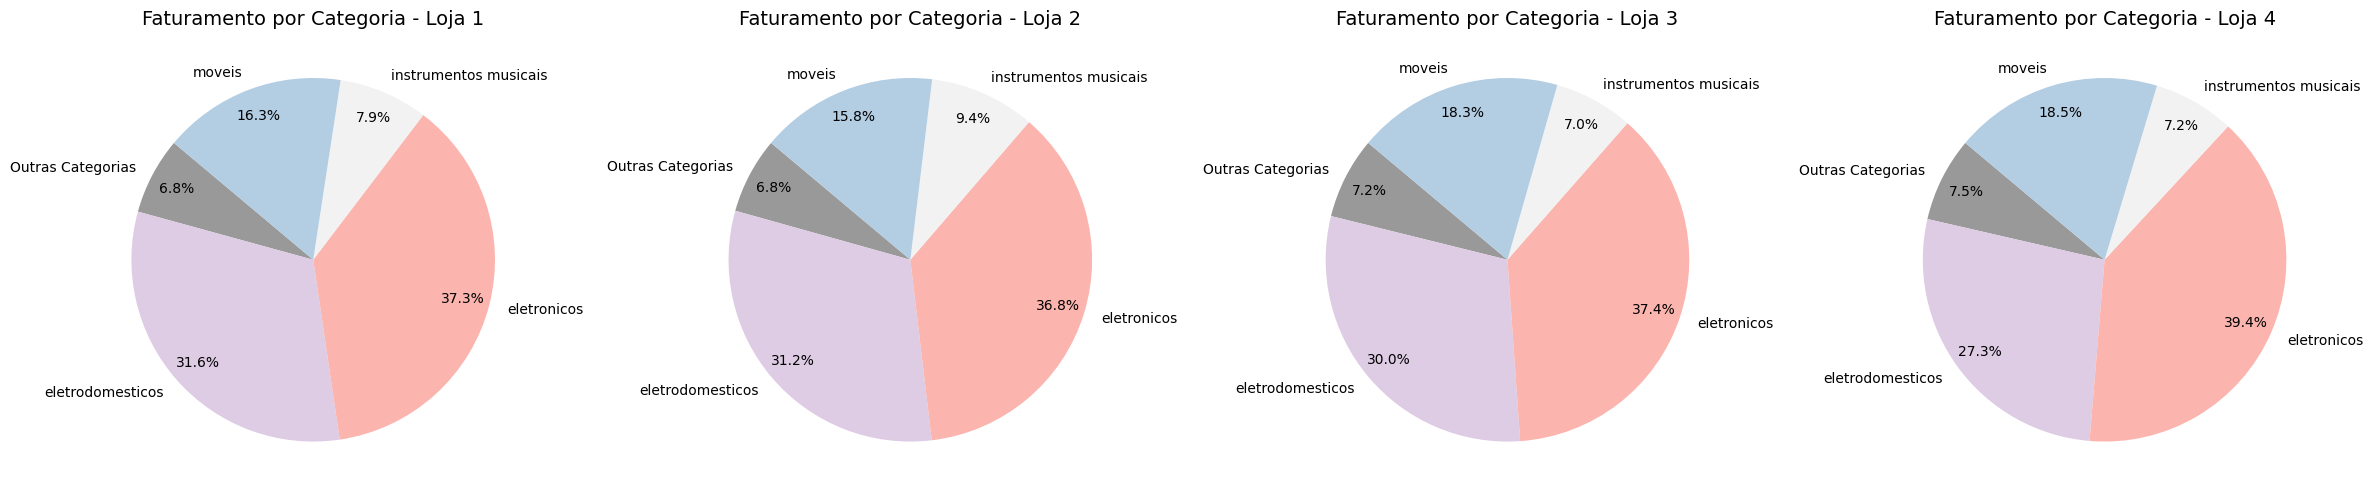

In [255]:
""" Gráfico de Pizza - Faturamento por Categoria com 'Outras Categorias' """

# Criar a figura com subplots (ajustando tamanho dinamicamente)
fig, axes = plt.subplots(1, num_lojas, figsize=(6 * num_lojas, 6))

# Iterar sobre cada loja e criar o gráfico de pizza correspondente
for idx, loja in enumerate(df_group_cat['loja'].unique()):
    df_aux = df_group_cat[df_group_cat['loja'] == loja].copy()
    df_aux = df_aux.sort_values('valor_total', ascending=False)

    # Calcular a participação percentual de cada categoria
    df_aux['percentual'] = df_aux['valor_total'] / df_aux['valor_total'].sum()

    # Agrupar categorias abaixo de 5% em "Outras Categorias"
    df_aux.loc[df_aux['percentual'] < 0.05, 'Categoria do Produto'] = 'Outras Categorias'

    # Agrupar os valores novamente para somar "Outras Categorias"
    df_aux = df_aux.groupby('Categoria do Produto', as_index=False).sum()

    # Aplicando cores fixas
    colors = [cor_categoria.get(categoria, '#999999') for categoria in df_aux['Categoria do Produto']]

    # Criando o gráfico de pizza
    axes[idx].pie(
        df_aux['valor_total'], labels=df_aux['Categoria do Produto'], autopct='%1.1f%%',
        colors=colors, startangle=140, pctdistance=0.85, 
    )
    axes[idx].set_title(f'Faturamento por Categoria - Loja {loja}', size=fontsize_titulo)

plt.tight_layout()
plt.show()

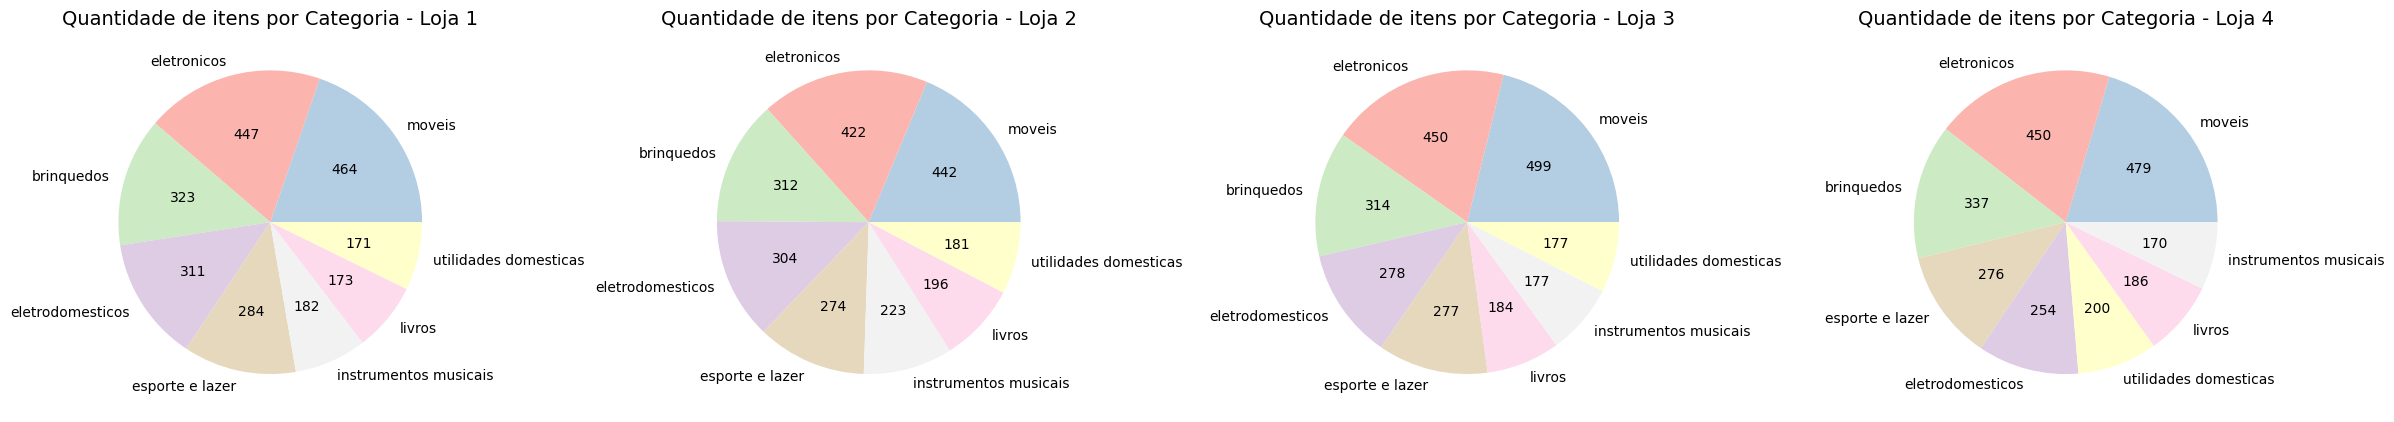

In [256]:
""" Gráfico de Pizza - Quantidade de Itens por Categoria """

fig, axes = plt.subplots(1, num_lojas, figsize=(6 * num_lojas, 6))

# Iterar sobre cada loja e criar o gráfico de pizza correspondente
for idx, loja in enumerate(df_group_cat['loja'].unique()):
    df_aux = df_group_cat[df_group_cat['loja'] == loja].copy()
    df_aux = df_aux.sort_values('quantidade', ascending=False)

    # Aplicando as mesmas cores no segundo gráfico
    colors = [cor_categoria.get(categoria, '#999999') for categoria in df_aux['Categoria do Produto']]

    # Criando o gráfico de pizza com rótulos de quantidades
    axes[idx].pie(df_aux['quantidade'], labels=df_aux['Categoria do Produto'],
                  autopct=lambda p: f'{int(p * df_aux["quantidade"].sum() / 100)}',
                  colors=colors)
    axes[idx].set_title(f'Quantidade de itens por Categoria - Loja {loja}',size=fontsize_titulo)

plt.tight_layout()
plt.show()

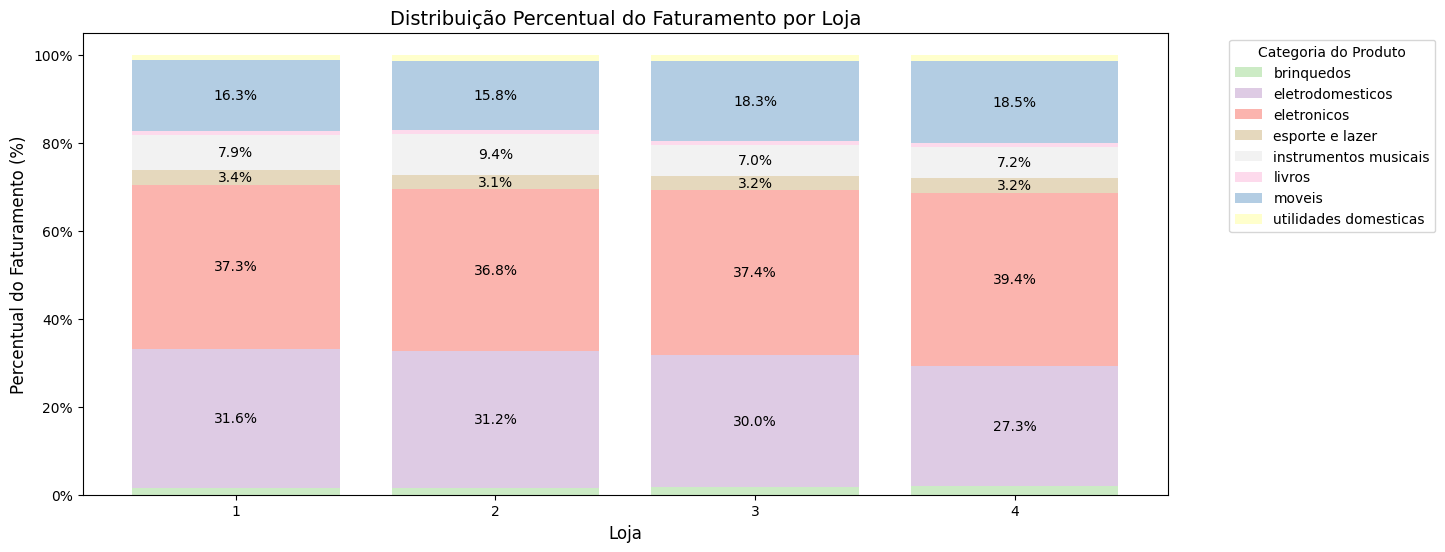

In [259]:

# Transformar os valores em percentuais
df_group_cat['percentual'] = df_group_cat.groupby('loja')['valor_total'].transform(lambda x: x / x.sum() * 100)
df_pivot = df_group_cat.pivot(index='loja', columns='Categoria do Produto', values='percentual')

bar_width = 0.8
x = np.arange(len(df_pivot.index))  # Posições no eixo x

plt.figure(figsize=(14, 4))
bottom = np.zeros(len(df_pivot.index))  # Inicializador para empilhamento

# Iterar sobre as categorias e empilhar as barras
for categoria in df_pivot.columns:
    bars = plt.bar(x, df_pivot[categoria], width=bar_width, label=categoria, bottom=bottom, color=cor_categoria[categoria])
    
    # Adicionar rótulos diretamente nas barras
    for bar in bars:
        height = bar.get_height()
        if height > 2:  # Exibir apenas valores significativos
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{height:.1f}%', 
                     ha='center', va='center', fontsize=10, color='black')

    bottom += df_pivot[categoria].fillna(0)  # Atualizar posição para empilhamento

plt.xticks(x, df_pivot.index)
plt.title('Distribuição Percentual do Faturamento por Loja', size=fontsize_titulo)
plt.xlabel('Loja', size=fontsize_eixos)
plt.ylabel('Percentual do Faturamento (%)', size=fontsize_eixos)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))  # Formatar eixo y como percentual

plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
# Calculando a média de avaliação por loja
df_group_avaliacao = df.groupby('loja')['Avaliação da compra'].mean().reset_index()

# Criar uma cópia do dataframe
df_avaliacao = df.copy()
df_avaliacao['Data da Compra'] = pd.to_datetime(df_avaliacao['Data da Compra'], format='%d/%m/%Y')
df_avaliacao['Ano'] = df_avaliacao['Data da Compra'].dt.year  
df_avaliacao['Mes_Ano'] = df_avaliacao['Data da Compra'].dt.to_period('M')

# Agrupar por Ano e Loja, calculando a média das avaliações
df_avaliacao_ano = df_avaliacao.groupby(['Ano', 'loja'])['Avaliação da compra'].mean().reset_index()
df_avaliacao_ano['Ano'] = df_avaliacao_ano['Ano'].astype(str)  

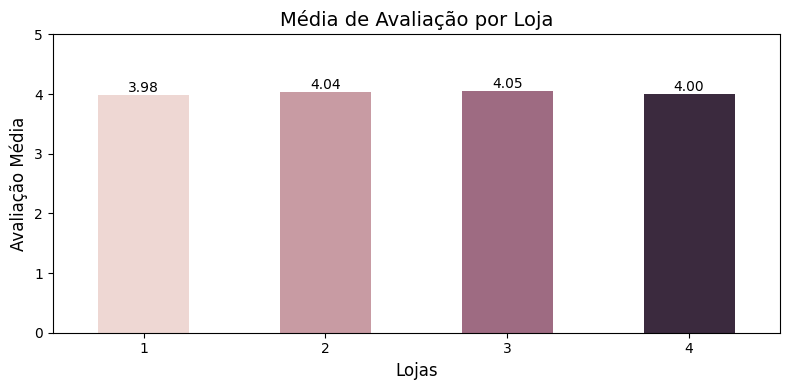

In [272]:

fig, ax = plt.subplots(figsize=(8, 4))  # Alterado para um tamanho maior

# Criando gráfico de barras para média de avaliação
ax = df_group_avaliacao.plot(
    x='loja', y='Avaliação da compra', kind='bar', ax=ax, 
    title='Média de Avaliação por Loja', legend=False, color=cores_paleta_lojas
)

# Adicionando rótulos sobre as barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2, min(p.get_height(), 5)), 
        ha='center', va='bottom', fontsize=10, color='black',
    )

plt.ylim(0, 5)
plt.title('Média de Avaliação por Loja', fontsize=fontsize_titulo)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Lojas', fontsize=fontsize_eixos)
plt.ylabel('Avaliação Média', fontsize=fontsize_eixos)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

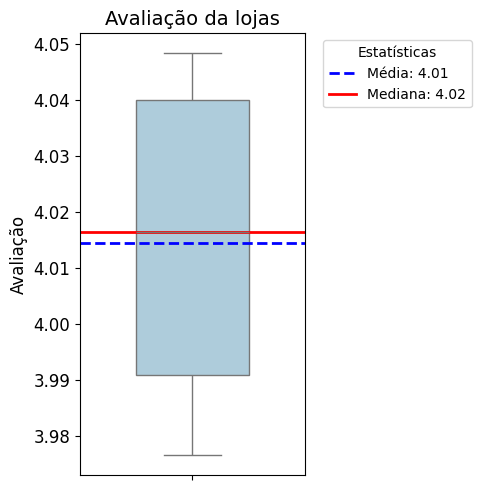

In [273]:
plt.figure(figsize=(5, 5))  
sns.boxplot(y=df_group_avaliacao['Avaliação da compra'], color='#A6CEE3', width=0.5)  

# Calcular média e mediana
media = df_group_avaliacao['Avaliação da compra'].mean()
mediana = df_group_avaliacao['Avaliação da compra'].median()

# Adicionar linhas para média e mediana com maior destaque
plt.axhline(media, color='blue', linestyle='--', linewidth=2, label=f'Média: {media:.2f}')
plt.axhline(mediana, color='red', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')

plt.title('Avaliação da lojas', fontsize=fontsize_titulo)
plt.ylabel('Avaliação', fontsize=12)
plt.xticks(fontsize=fontsize_eixos)
plt.yticks(fontsize=fontsize_eixos)

plt.legend(title='Estatísticas', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

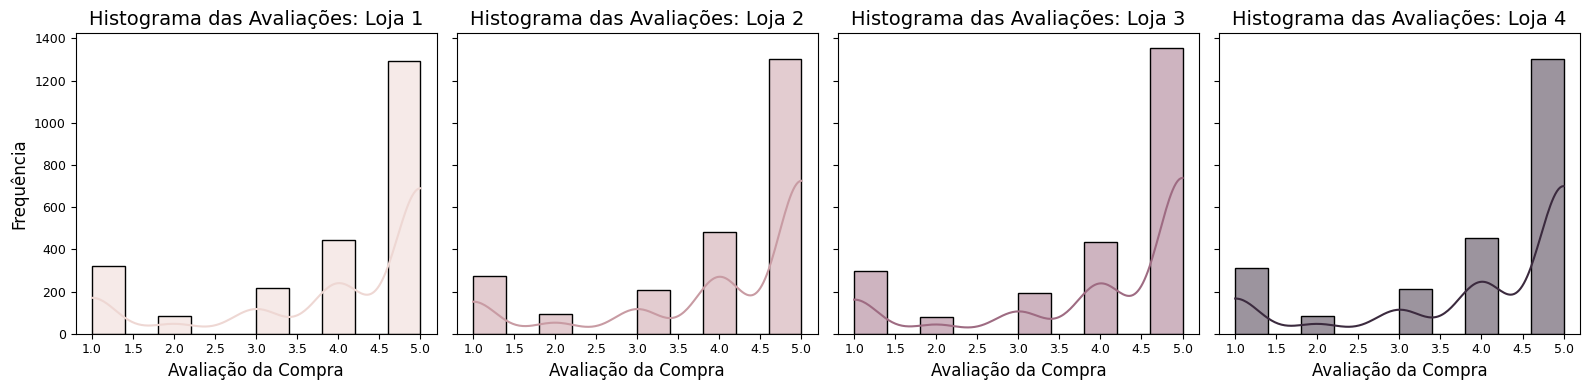

In [274]:
fig, axes = plt.subplots(1, num_lojas, figsize=(4 * num_lojas, 4), sharex=True, sharey=True)

# Criando histogramas lado a lado por loja
for idx, loja in enumerate(df['loja'].unique()):
    df_aux = df[df['loja'] == loja]

    sns.histplot(df_aux['Avaliação da compra'], bins=10, kde=True, ax=axes[idx], color=cores_paleta_lojas[idx])

    axes[idx].set_title(f'Histograma das Avaliações: Loja {loja}', fontsize=fontsize_titulo)
    axes[idx].set_xlabel("Avaliação da Compra", fontsize=fontsize_eixos)
    axes[idx].set_ylabel("Frequência", fontsize=fontsize_eixos)
    axes[idx].tick_params(axis='both', labelsize=9)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

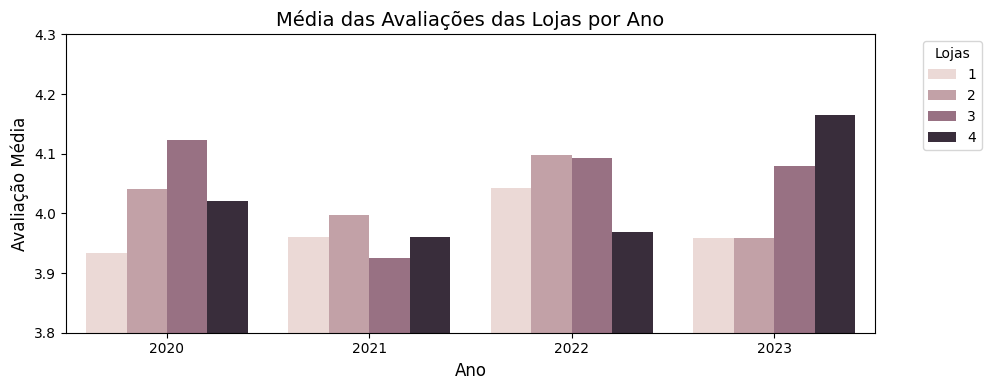

In [275]:
plt.figure(figsize=(10, 4))

# Criando gráfico de barras por loja
sns.barplot(x='Ano', y='Avaliação da compra', hue='loja', data=df_avaliacao_ano, palette=cores_paleta_lojas)

# Adicionar título e rótulos
plt.title('Média das Avaliações das Lojas por Ano', fontsize=fontsize_titulo)
plt.xlabel('Ano', fontsize=fontsize_eixos)
plt.ylabel('Avaliação Média', fontsize=fontsize_eixos)
plt.xticks( fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.ylim(3.8,4.3)
plt.tight_layout()
plt.show()

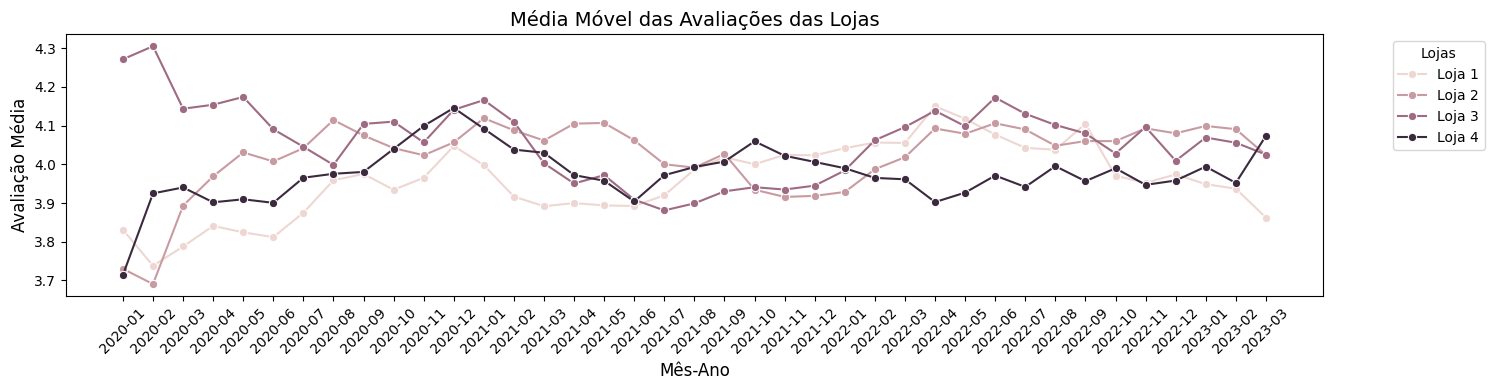

In [278]:
df_time = df_avaliacao.groupby(['Mes_Ano', 'loja'])['Avaliação da compra'].mean().reset_index()
df_time['Media_Movel'] = df_time.groupby('loja')['Avaliação da compra'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())
df_time['Mes_Ano'] = df_time['Mes_Ano'].astype(str)

plt.figure(figsize=(15, 4))

# Iterar sobre as lojas e aplicar as cores corretamente
for idx, loja in enumerate(df_time['loja'].unique()):
    df_aux = df_time[df_time['loja'] == loja]
    sns.lineplot(x='Mes_Ano', y='Media_Movel', data=df_aux, marker='o', 
                 color=cores_paleta_lojas[idx % len(cores_paleta_lojas)], label=f'Loja {loja}')

# Melhorar título e rótulos
plt.title('Média Móvel das Avaliações das Lojas', fontsize=fontsize_titulo)
plt.xlabel('Mês-Ano', fontsize=fontsize_eixos)
plt.ylabel('Avaliação Média', fontsize=fontsize_eixos)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

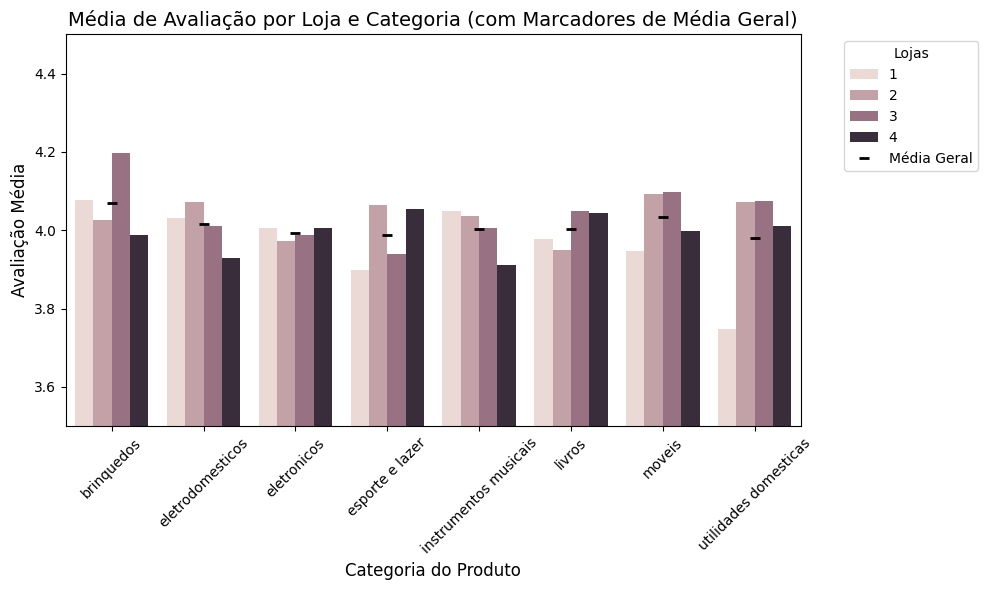

In [280]:

df_media = df.groupby(['loja', 'Categoria do Produto'])['Avaliação da compra'].mean().reset_index()
df_media_geral = df.groupby('Categoria do Produto')['Avaliação da compra'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Plotar as médias individuais das lojas por categoria com a paleta personalizada
sns.barplot(x='Categoria do Produto', y='Avaliação da compra', hue='loja', data=df_media, palette=cores_paleta_lojas)

# Adicionar apenas os marcadores da média geral por categoria
sns.pointplot(x='Categoria do Produto', y='Avaliação da compra', data=df_media_geral, 
    color='black', markers='_', linestyles="",  label='Média Geral'
)

# Melhorar título e rótulos
plt.title('Média de Avaliação por Loja e Categoria (com Marcadores de Média Geral)', fontsize=fontsize_titulo)
plt.xlabel('Categoria do Produto', fontsize=fontsize_eixos)
plt.ylabel('Avaliação Média', fontsize=fontsize_eixos)
plt.xticks(rotation=45)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.ylim(3.5, 4.5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

<Figure size 1200x600 with 0 Axes>

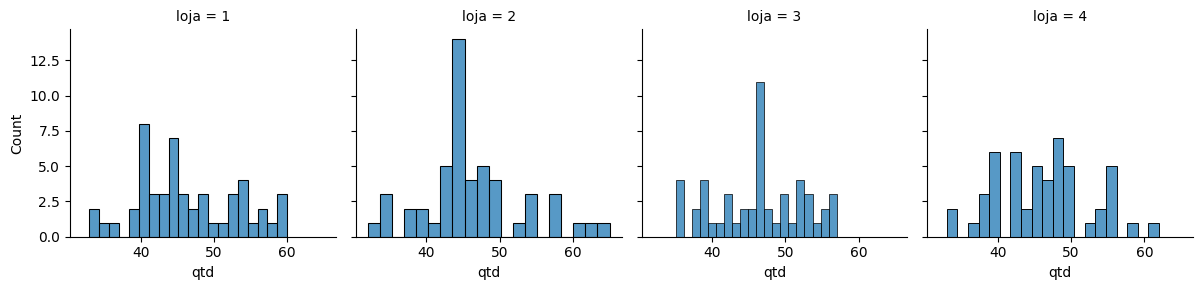

In [219]:
# histogramas individuais por loja para visualizar a distribuição de vendas.
df_group_prod = df.groupby(['loja', 'Produto']).agg(qtd=('Produto', 'count'), valor=('Preço', 'sum')).reset_index()

plt.figure(figsize=(12, 6))

g = sns.FacetGrid(df_group_prod, col="loja", col_wrap=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="qtd", bins=20)
plt.show()

In [220]:
df_group_p = df.copy()
df_group_p['Produto'] = df_group_p['Categoria do Produto'] + " | "+ df_group_p['Produto'] 
df_group_p = df_group_p.groupby(['Produto','Categoria do Produto']).agg(qtd=('Produto', 'count'), valor=('Preço', 'sum')).reset_index()
df_group_p = df_group_p.sort_values('valor',ascending=False).reset_index(drop=True)
df_group_p['percent'] = df_group_p['valor']/df_group_p['valor'].sum()*100
df_group_p['cumsum'] = df_group_p['percent'].cumsum()     
df_group_p.head(5)                        

,Produto,Categoria do Produto,qtd,valor,percent,cumsum
0,eletronicos | TV Led UHD 4K,eletronicos,187,576652.70,9.821231,9.821231
1,eletronicos | Celular Plus X42,eletronicos,198,534735.14,9.107315,18.928546
2,eletrodomesticos | Geladeira,eletrodomesticos,191,513249.34,8.741380,27.669926
3,eletronicos | Smart TV,eletronicos,192,386963.12,6.590543,34.260469
4,eletrodomesticos | Lavadora de roupas,eletrodomesticos,176,323292.37,5.506138,39.766607


In [221]:
# Agrupar por loja e produto, somando o valor
df_group = df.groupby(['loja', 'Produto'])['Preço'].sum().reset_index()

# Ordenar os valores dentro de cada loja e selecionar os top 5
df_top5 = df_group.groupby('loja').apply(lambda x: x.nlargest(5, 'Preço')).reset_index(drop=True)
df_top5['Rank'] = df_top5.groupby('loja').cumcount() + 1
df_top5


,loja,Produto,Preço,Rank
0,1,TV Led UHD 4K,189534.28,1
1,1,Geladeira,149524.28,2
2,1,Celular Plus X42,130536.40,3
3,1,Smart TV,89936.15,4
4,1,Lavadora de roupas,87711.30,5
5,2,Celular Plus X42,150967.83,1
6,2,TV Led UHD 4K,137833.06,2
7,2,Geladeira,130176.48,3
8,2,Lavadora de roupas,89016.81,4
9,2,Smart TV,81522.94,5


In [222]:
# produtos que mais faturam no top 5 de cada loja
df_top5['Produto'].value_counts()

Produto
TV Led UHD 4K         4
Geladeira             4
Celular Plus X42      4
Smart TV              4
Lavadora de roupas    2
Lava louças           1
Tablet ABXY           1
Name: count, dtype: int64

In [223]:
# Agrupar por loja e produto, somando o valor
df_group = df.groupby(['loja', 'Produto'])['Preço'].count().reset_index()
df_group.rename(columns={'Preço':'quantidade'}, inplace=True)

# Ordenar os valores dentro de cada loja e selecionar os top 5
df_top5 = df_group.groupby('loja').apply(lambda x: x.nlargest(5, 'quantidade')).reset_index(drop=True)
df_top5['Rank'] = df_top5.groupby('loja').cumcount() + 1

df_top5

,loja,Produto,quantidade,Rank
0,1,Guarda roupas,60,1
1,1,Micro-ondas,60,2
2,1,TV Led UHD 4K,60,3
3,1,Secadora de roupas,58,4
4,1,Blocos de montar,56,5
5,2,Iniciando em programação,65,1
6,2,Micro-ondas,62,2
7,2,Bateria,61,3
8,2,Pandeiro,58,4
9,2,Violão,58,5


In [224]:
# produtos que mais vendem (em quantidade) no top 5 de cada loja
df_top5['Produto'].value_counts()

Produto
Micro-ondas                 2
Cama king                   2
Guarda roupas               1
Dashboards com Power BI     1
Faqueiro                    1
Cama box                    1
Jogo de panelas             1
Cômoda                      1
Mesa de jantar              1
Kit banquetas               1
Violão                      1
Pandeiro                    1
Bateria                     1
Iniciando em programação    1
Blocos de montar            1
Secadora de roupas          1
TV Led UHD 4K               1
Carrinho controle remoto    1
Name: count, dtype: int64

C:\Users\emili\AppData\Local\Temp\ipykernel_27696\1894008560.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


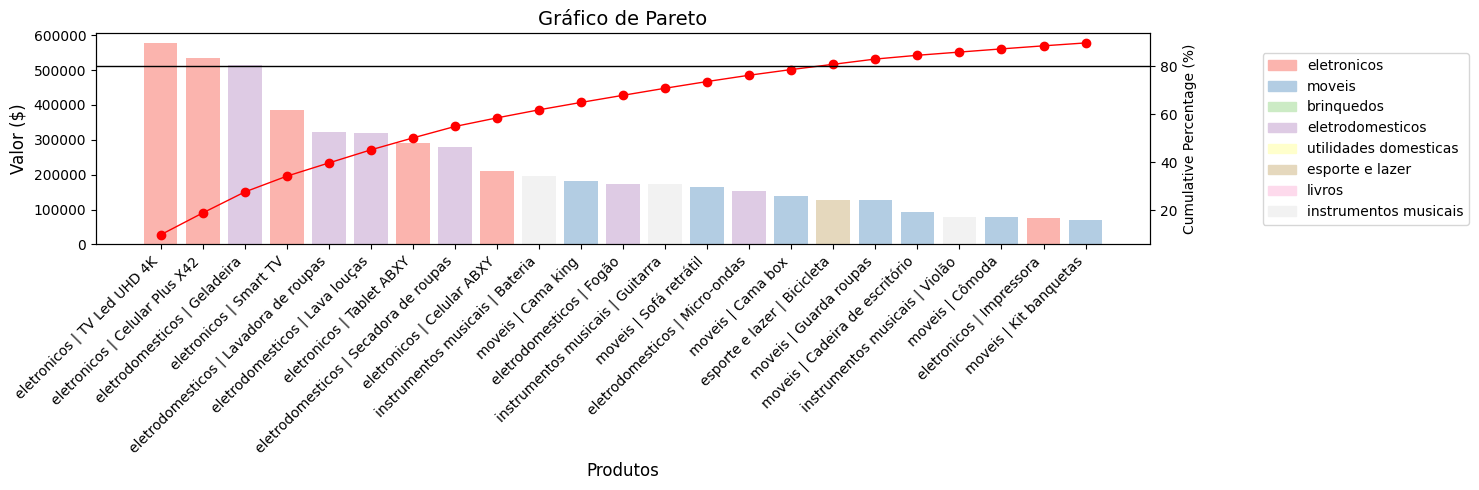

In [285]:
df_aux = df_group_p[df_group_p['cumsum'] < 90].sort_values(by='valor', ascending=False)

fig, ax = plt.subplots(figsize=(15, 5))

# Definir as cores das barras com base na categoria do produto
colors = [cor_categoria.get(produto, '#999999') for produto in df_aux['Categoria do Produto']]

ax.bar(df_aux['Produto'], df_aux['valor'], color=colors)

# Criar um eixo secundário para a curva de Pareto
ax2 = ax.twinx()
ax2.plot(df_aux['Produto'], df_aux['cumsum'], color='red', marker='o', linestyle='-', linewidth=1)

# Adicionar uma linha horizontal preta em 80%
ax2.axhline(y=80, color='black', linestyle='-', linewidth=1)

ax.set_xlabel('Produtos', size=fontsize_eixos)
ax.set_ylabel('Valor ($)', size=fontsize_eixos)
ax2.set_ylabel('Cumulative Percentage (%)')
plt.title('Gráfico de Pareto', fontsize=fontsize_titulo)

# Criar a legenda das cores
legend_patches = [mpatches.Patch(color=cores_paleta[idx], label=categoria) 
                  for idx, categoria in enumerate(categorias_unicas)]

ax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja


In [226]:
df.groupby(['loja']).agg(frete_medio=('Frete', 'mean')).reset_index().sort_values('frete_medio', ascending=False)

,loja,frete_medio
0,1,34.691805
1,2,33.621941
2,3,33.074464
3,4,31.278997


In [227]:
# Criar uma cópia do dataframe
df_fat_loja = df.copy()
df_fat_loja['Data da Compra'] = pd.to_datetime(df_fat_loja['Data da Compra'], format='%d/%m/%Y')
df_fat_loja['Mes_Ano'] = df_fat_loja['Data da Compra'].dt.to_period('M')
df_fat_loja['Ano'] = df_fat_loja['Data da Compra'].dt.to_period('Y')

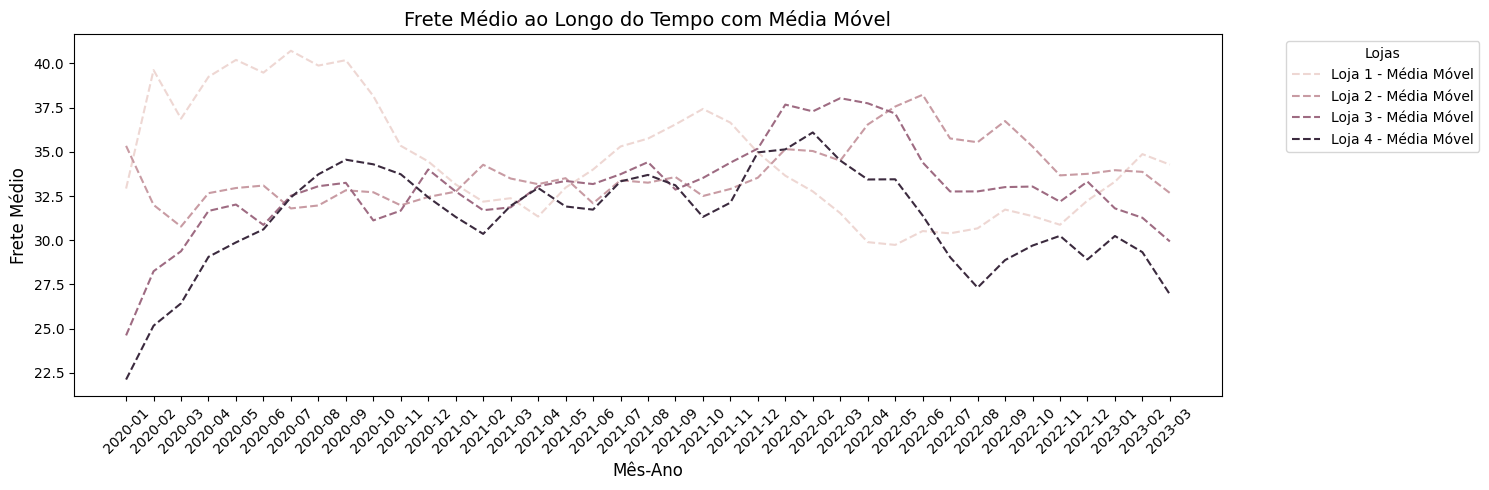

In [287]:
# Agrupar por loja e mês, calculando a média do frete
df_group_fat_loja = df_fat_loja.groupby(['loja', 'Mes_Ano'])['Frete'].mean().reset_index()

plt.figure(figsize=(15, 5))

# Iterar sobre as lojas e aplicar as cores corretamente
for idx, loja in enumerate(df_group_fat_loja['loja'].unique()):
    df_aux = df_group_fat_loja[df_group_fat_loja['loja'] == loja].copy()
    df_aux = df_aux.sort_values('Mes_Ano')
    df_aux.set_index('Mes_Ano', inplace=True)

    # Aplicando média móvel de 6 meses
    df_aux['Frete_MM'] = df_aux['Frete'].rolling(window=6, min_periods=1).mean()

    # Plotar linha da média móvel com cores personalizadas
    plt.plot(df_aux.index.astype(str), df_aux['Frete_MM'], 
             label=f'Loja {loja} - Média Móvel', 
             color=cores_paleta_lojas[idx % len(cores_paleta_lojas)], linestyle='dashed')

# Adicionar título e rótulos
plt.title('Frete Médio ao Longo do Tempo com Média Móvel', fontsize=fontsize_titulo)
plt.xlabel('Mês-Ano', fontsize=fontsize_eixos)
plt.ylabel('Frete Médio', fontsize=fontsize_eixos)
plt.xticks(rotation=45)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

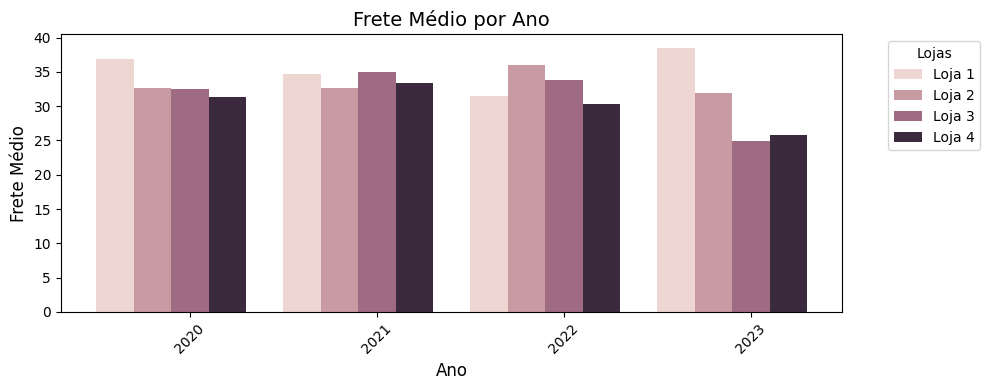

In [289]:
df_group_fat_loja = df_fat_loja.groupby(['loja', 'Ano'])['Frete'].mean().reset_index()
df_pivot = df_group_fat_loja.pivot(index='Ano', columns='loja', values='Frete')

bar_width = 0.2

plt.figure(figsize=(10, 4))

# Definir os anos como eixo X
anos = df_pivot.index.astype(str)
x = np.arange(len(anos))  # Posições no eixo x

# Criando gráfico de barras por loja com paleta personalizada
for idx, loja in enumerate(df_pivot.columns):
    plt.bar(x + idx * bar_width, df_pivot[loja], width=bar_width, 
            label=f'Loja {loja}', color=cores_paleta_lojas[idx % len(cores_paleta_lojas)])

# Ajustar rótulos e título
plt.xticks(x + bar_width * (len(df_pivot.columns) / 2), anos, rotation=45)
plt.title('Frete Médio por Ano', fontsize=fontsize_titulo)
plt.xlabel('Ano', fontsize=fontsize_eixos)
plt.ylabel('Frete Médio', fontsize=fontsize_eixos)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.ticklabel_format(style='plain', axis='y')  

plt.tight_layout()
plt.show()

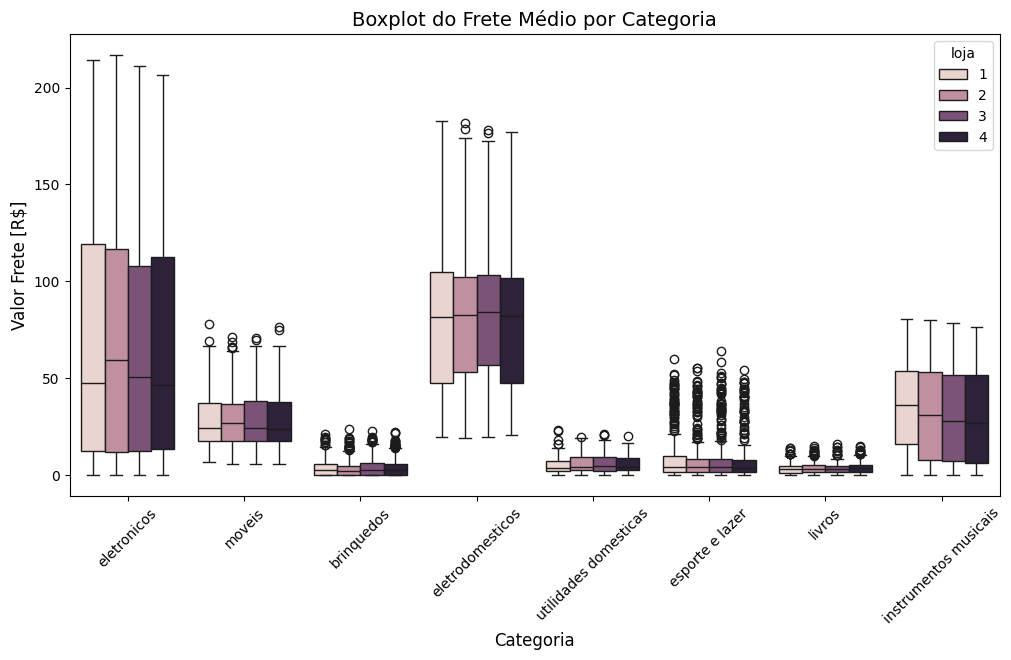

In [290]:
df_group_frete = df.groupby(['loja','Categoria do Produto']).agg(frete_medio=('Frete', 'mean')).reset_index().sort_values(['Categoria do Produto','frete_medio'], ascending=[False,False])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Categoria do Produto', y='Frete', data=df, hue='loja')

plt.title('Boxplot do Frete Médio por Categoria',size=fontsize_titulo)
plt.xlabel('Categoria', size=fontsize_eixos)
plt.ylabel('Valor Frete [R$]', size=fontsize_eixos)
plt.xticks(rotation=45) 
plt.show()

- Eletrônicos e eletrodomésticos têm os maiores custos médios de frete, com uma ampla variação e presença de outliers. Isso pode estar relacionado ao peso e dimensões desses produtos.
- Brinquedos, utilidades domésticas, esportes e lazer e livros apresentam custos médios de frete mais baixos, com pouca variabilidade.
- Móveis e instrumentos musicais têm custos moderados, mas com diferenças perceptíveis entre as lojas.
- Há variações significativas entre as lojas para algumas categorias, indicando que determinadas lojas podem ter políticas de frete mais vantajosas para certos tipos de produtos.

A análise dos eletrônicos e eletrodomésticos mostra que essa categoria apresenta os maiores custos médios de frete, com bastante variação entre as lojas. Aqui estão alguns possíveis insights:
- Variação de frete entre lojas: Algumas lojas podem oferecer descontos ou condições especiais para produtos mais pesados, enquanto outras podem repassar totalmente o custo de transporte ao consumidor.
- Impacto do tamanho e peso: Itens como geladeiras, TVs grandes e máquinas de lavar costumam ter fretes mais elevados devido às dimensões e ao manuseio necessário no transporte.
- Possibilidade de retirada em loja: Algumas lojas oferecem a opção de retirada gratuita, o que pode ser uma alternativa viável para evitar custos elevados de frete.
- Frete grátis em compras acima de um valor mínimo: Muitas lojas adotam essa estratégia para incentivar compras maiores, o que pode compensar o custo do envio de eletrônicos.